<a href="https://colab.research.google.com/github/shariqfz/Fake-News-Detection-Text-Classification/blob/main/RandomForestClassifier/RandomForestWithHateSpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf "/content/Fake-News-Detection-Text-Classification"

In [2]:
import pandas as pd

In [3]:
!git clone https://github.com/shariqfz/Fake-News-Detection-Text-Classification.git

Cloning into 'Fake-News-Detection-Text-Classification'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 97 (delta 10), reused 9 (delta 9), pack-reused 84
Receiving objects: 100% (97/97), 123.51 MiB | 14.94 MiB/s, done.
Resolving deltas: 100% (37/37), done.
Updating files: 100% (20/20), done.


In [4]:
# data_path = "/content/Fake-News-Detection-Text-Classification/data/HateSpeech/hate_speech_cleaned_and_stopword_removed_combined_data.csv"

hate_speech_data_path = "/content/Fake-News-Detection-Text-Classification/data/hate_speech_concatenated_in_text.csv"

data = pd.read_csv(hate_speech_data_path)

In [6]:
data.head()

,Unnamed: 0,text,Label,hate_speech_class
0,17226,seven miner kill one miss coal mine collaps tu...,1.0,0
1,10782,treasuri weiss wit hous puerto rico hear offic...,1.0,1
2,19623,least peopl kill earthquak mexico least peopl ...,1.0,0
3,16853,graft probe mexico presid alli pose tricki cha...,1.0,0
4,9050,us militari say disclos detail injur servic me...,1.0,2


In [7]:
data['text'].iloc[0]

'seven miner kill one miss coal mine collaps turkey seven miner kill anoth wa miss part coal mine turkey southeastern provinc sirnak collaps tuesday govern spokesman bekir bozdag said search rescu team look miss worker wa trap site turkey energi ministri said coal mine wa unlicens oper illeg activ mine field sirnak accid took place stop gener director mine affair becaus carri oper secur risk energi ministri said workplac accid unusu turkey rapid growth past decad ha seen construct boom scrambl meet soar energi commod demand worker safeti standard often fail keep pace worst ever mine disast took place may western town soma worker kill Hate Speech'

In [8]:
"""
class meanings:

0 - hate speech
1 - offensive language
2 - neither

"""

'\nclass meanings:\n\n0 - hate speech\n1 - offensive language\n2 - neither\n\n'

In [9]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [13]:
# Importing necessary paackages

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.ensemble import RandomForestClassifier


seed = 5343

In [15]:
X=data['text']
Y=data['Label']

In [14]:
# Function to retrieve processed words

def final(X_data_full):

    # function for removing punctuations
    def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation_table)
        return string2

    X_data_full_clear_punct = []
    for i in range(len(X_data_full)):
        test_data = remove_punct(X_data_full.iloc[i])
        X_data_full_clear_punct.append(test_data)

    # function to remove stopwords
    def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2

    X_data_full_clear_stopwords = []
    for i in range(len(X_data_full)):
        test_data = remove_stopwords(X_data_full.iloc[i])
        X_data_full_clear_stopwords.append(test_data)

    # function for tokenizing
    def tokenize_words(X_data_func):
        words = nltk.word_tokenize(X_data_func)
        return words

    X_data_full_tokenized_words = []
    for i in range(len(X_data_full)):
        test_data = tokenize_words(X_data_full.iloc[i])
        X_data_full_tokenized_words.append(test_data)

    # function for lemmatizing
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words

    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full.iloc[i])
        X_data_full_lemmatized_words.append(test_data)

    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()


    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()

    return X_data_full_tfidf

In [18]:
X = final(X)

In [19]:
# Preparing training and testing data using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= seed)

In [20]:
# Fitting the model and making prediction

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [21]:
# Finding Classification report

print(classification_report(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       107
         1.0       0.95      0.78      0.86        93

    accuracy                           0.88       200
   macro avg       0.89      0.87      0.88       200
weighted avg       0.89      0.88      0.88       200

Accuracy :  88.0  %
f1_score :  0.879


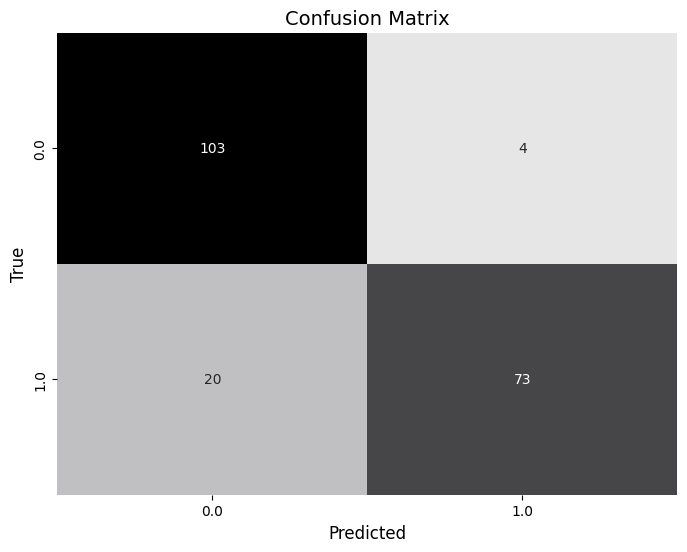

In [22]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Define a custom color palette
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0)

# Create a heatmap with custom styling
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
